# B_Innovative Classes 

So in the last class we played with a toy dataset and implemented our first complete deep learning network. We understood
why we need hidden layers and how they function. 

We learnt that most of the times our input and output will not have direct correlation, and that time we need to create our
intermediate dataset that does have correlation. These intermediate dataset can be called as hidden layers

We understood the secret to "Sometimes correlation" i.e we are going to turn our node "off" when the value would be below 0

The fancy term for this "if the node would be negative then set it to 0" logic is called a nonlinearity. There are many kind 
of nonlinearities. We discussed and also implemented . 


We learnt "moving delta signal around" is called backpropagation
This class 
    1. we will implement batch gradient descent 
    2. we will learn about droup out
     

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
np.random.seed(1)

In [49]:
#testing
a = np.array([[342,34,3,342,2]])
print(a.shape)
b = a.T
print(b.shape)
c = np.array([3434,43,4343])
print(c.shape)
print(2*(np.random.random((3,4)))-1)
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )
for i in range(len(streetlights)):
    print(streetlights[i:i+1])
print(np.random.randint(4,5))

(1, 5)
(5, 1)
(3,)
[[ 0.23200845  0.35130857  0.97744442  0.89735789]
 [ 0.73228037 -0.95557339  0.75604333 -0.03748984]
 [ 0.449137   -0.89546064  0.59703006 -0.96548621]]
[[1 0 1]]
[[0 1 1]]
[[0 0 1]]
[[1 1 1]]
4


In [30]:
np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T
    
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
   layer_2_error = 0
   for i in range(len(streetlights)):
      layer_0 = streetlights[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1,weights_1_2)

      layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

      layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

   if(iteration % 10 == 9):
      print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


Sometimes the network overfit and to combat it we use regularization-->.  we already used relu in our last example. now lets try
with one more example

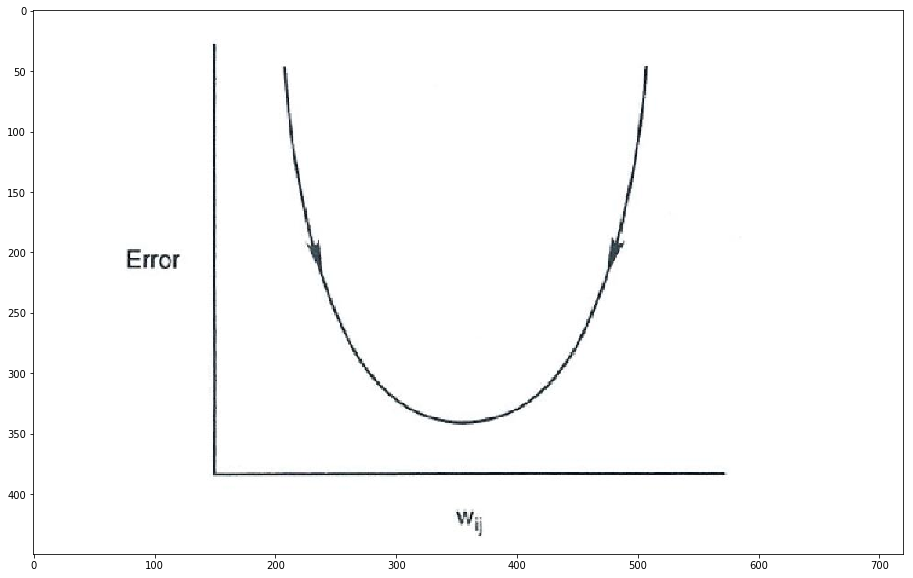

In [40]:
img = cv2.imread('DATa\\Figure5.png')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
 ## This is your plot
plt.imshow(img)

In [32]:
import tensorflow

In [33]:
from tensorflow.keras.datasets import mnist

In [36]:
import sys



(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1


for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(np.round(correct_cnt/float(len(images)))))

 I:349 Train-Err:0.108 Train-Acc:1.0

So seeing this we thing we have done a pretty awesome job , our accuracy is kind of 100 % but its not the real test.
When we will see how our network performs on our test data , then we can acutally talk about performance of the 
system.

In [35]:
if(j % 10 == 0 or j == iterations-1):
    error, correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))) + "\n")
    print()

 Test-Err:0.653 Test-Acc:0.7073



# Memorization vs Generalization

In [38]:
# -->
(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))
    
    if(j % 10 == 0 or j == iterations-1):
        error, correct_cnt = (0.0, 0)
        
        for i in range(len(test_images)):

            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1,weights_1_2)

            error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) == \
                                            np.argmax(test_labels[i:i+1]))
        sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(correct_cnt/float(len(test_images))))
        print()



 I:0 Train-Err:0.722 Train-Acc:0.537 Test-Err:0.601 Test-Acc:0.6488
 I:10 Train-Err:0.312 Train-Acc:0.901 Test-Err:0.420 Test-Acc:0.8114
 I:20 Train-Err:0.260 Train-Acc:0.937 Test-Err:0.414 Test-Acc:0.8111
 I:30 Train-Err:0.232 Train-Acc:0.946 Test-Err:0.417 Test-Acc:0.8066
 I:40 Train-Err:0.215 Train-Acc:0.956 Test-Err:0.426 Test-Acc:0.8019
 I:50 Train-Err:0.204 Train-Acc:0.966 Test-Err:0.437 Test-Acc:0.7982
 I:60 Train-Err:0.194 Train-Acc:0.967 Test-Err:0.448 Test-Acc:0.7921
 I:70 Train-Err:0.186 Train-Acc:0.975 Test-Err:0.458 Test-Acc:0.7864
 I:80 Train-Err:0.179 Train-Acc:0.979 Test-Err:0.466 Test-Acc:0.7817
 I:90 Train-Err:0.172 Train-Acc:0.981 Test-Err:0.474 Test-Acc:0.7758
 I:100 Train-Err:0.166 Train-Acc:0.984 Test-Err:0.482 Test-Acc:0.7706
 I:110 Train-Err:0.161 Train-Acc:0.984 Test-Err:0.489 Test-Acc:0.7686
 I:120 Train-Err:0.157 Train-Acc:0.986 Test-Err:0.496 Test-Acc:0.766
 I:130 Train-Err:0.153 Train-Acc:0.999 Test-Err:0.502 Test-Acc:0.7622
 I:140 Train-Err:0.149 Train-Acc

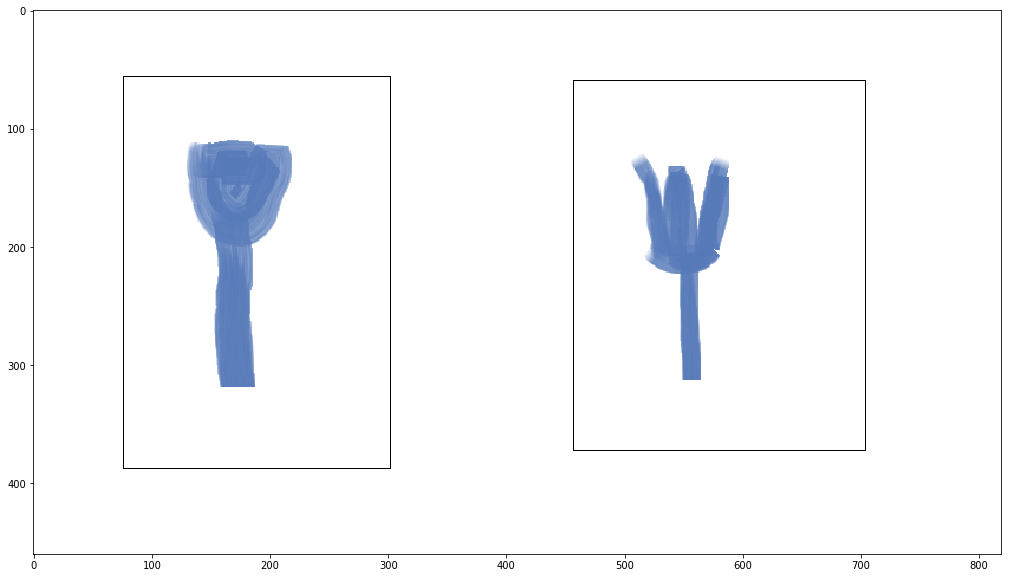

In [41]:
img = cv2.imread('DATa\\secE1.png')

plt.figure(figsize=(20,10))
 ## This is your plot
plt.imshow(img)

In truth one way to view the weights of a neural nework is a high dimensional shape. As you ttrain, this shape molds
around the shape of your data, learning to distinguish one pattern from another. Unfortunately, the images in our testing
dataset were slightly different than the patterns inour training dataset. This caused our network to fail on many of 
our testing examples.

And this phenomenon is known as "overfitting"

# Where overfitting comes from?

-->
Lets take a real time example

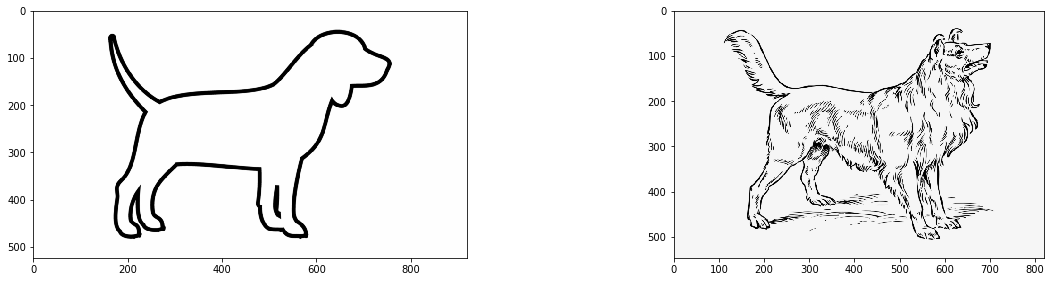

In [46]:
img = cv2.imread('DATa\\dog1.png')
img2 = cv2.imread('DATa\\dog2.png')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2)
plt.show()

-->
The simplest Regularization: Early stopping
    
As a matter of a fact, early stopping is the cheapest form of "regularization" 

Well Regularization is a subfield of methods used to encourage generalization in learned models, often by increasing
the difficulty for a model to learn the fine-grained details of training data.



# Dropout
This is very simple as it sounds. During the training, you randomly set neurons in your network to zero.

--->

Why does Dropout work?
Dropout makes our big network act like a smaller one by randomly training little subsections of the network at a time
and smaller networks don't overfit
-->

Droupout is actually a form of training a bunch of networks and averaging them

-->

Well the takeaway is this; if you train 100 neural networds they will tend to latch onto different noise but similar
broad signal. Thus when they make mistakes, they oftem make differing mistakes. This means that if we allowed them to vote 
equally, their noise would tend to cancel out, revealing only what they have all learnt in common, the signal




In [47]:
i = 0
layer_0 = images[i:i+1]
dropout_mask = np.random.randint(2,size=layer_1.shape)

layer_1 *= dropout_mask * 2
layer_2 = np.dot(layer_1, weights_1_2)

error += np.sum((labels[i:i+1] - layer_2) ** 2)

correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i+i+1]))

layer_2_delta = (labels[i:i+1] - layer_2)
layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

layer_1_delta *= dropout_mask

weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

In [48]:
np.random.seed(1)
def relu(x):
    return (x >= 0) * x # returns x if x > 0
                        # returns 0 otherwise

def relu2deriv(output):
    return output >= 0 #returns 1 for input > 0

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))
            


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er

observe test accuracy and train accuracy

# Batch Gradient Descent
Now we are going to train 100 training examples at a time averaging the weight updates between all 100 examples. As it turns
out, individual training examples are very noisy in terms of the weight updates tehy generate. Thus averaging them makes for
a smoother learning process

In [50]:
np.random.seed(1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu2deriv(output):
    return output >= 0 # returns 1 for input > 0

batch_size = 100
alpha, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

            layer_2_delta = (labels[batch_start:batch_end]-layer_2)/batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.815 Test-Acc:0.3832 Train-Err:1.284 Train-Acc:0.165
I:10 Test-Err:0.568 Test-Acc:0.7173 Train-Err:0.591 Train-Acc:0.672
I:20 Test-Err:0.510 Test-Acc:0.7571 Train-Err:0.532 Train-Acc:0.729
I:30 Test-Err:0.485 Test-Acc:0.7793 Train-Err:0.498 Train-Acc:0.754
I:40 Test-Err:0.468 Test-Acc:0.7877 Train-Err:0.489 Train-Acc:0.749
I:50 Test-Err:0.458 Test-Acc:0.793 Train-Err:0.468 Train-Acc:0.775
I:60 Test-Err:0.452 Test-Acc:0.7995 Train-Err:0.452 Train-Acc:0.799
I:70 Test-Err:0.446 Test-Acc:0.803 Train-Err:0.453 Train-Acc:0.792
I:80 Test-Err:0.451 Test-Acc:0.7968 Train-Err:0.457 Train-Acc:0.786
I:90 Test-Err:0.447 Test-Acc:0.795 Train-Err:0.454 Train-Acc:0.799
I:100 Test-Err:0.448 Test-Acc:0.793 Train-Err:0.447 Train-Acc:0.796
I:110 Test-Err:0.441 Test-Acc:0.7943 Train-Err:0.426 Train-Acc:0.816
I:120 Test-Err:0.442 Test-Acc:0.7966 Train-Err:0.431 Train-Acc:0.813
I:130 Test-Err:0.441 Test-Acc:0.7906 Train-Err:0.434 Train-Acc:0.816
I:140 Test-Err:0.447 Test-Acc:0.7874 Train-Err:0